# Introduction
Company brand strength is important to a company's recruitment efforts.  Companies with high brand strength are able to attract and hire a greater number of qualified candidates more quickly than a competitor with lower brand strength.  The current study looks as using exit survey data to identify potential leading indicators for company brand strength.  Specifically, it looks at four items measuring common supervisory behaviors and how they influence a person's likelihood to work for the company again in the future as well as recommend the company as a place to work.

# Survey Measures
The exit survey contains two outcome items:
- How likely are you to recommend the company as a place to work.
- If given the opportunity in the future, how likely are you to consider returning to the company.

The exit survey contains four input items:
- My supervisor set clear expectations.
- My supervisor provided me with timely feedback.
- My supervisor recognized me when I do a good job.
- My supervisor cared for me as a person.

# Response Scales
Two 5-pt Likert scale were used used in the survey:
- Likelihood (Outcome measures)
- Agreement (Supervisor behaviors)

### Likelihood Response Options
- 5 - Very Likely  
- 4 - Likely  
- 3 - Neutral   
- 2 - Unlikely  
- 1 - Very Unlikely  

### Agreement Response Options
- 5 - Strongly Agree  
- 4 - Agree  
- 3 - Neutral  
- 2 - Disagree  
- 1 - Strongly Disagree  


# Summary Statistics

In [39]:
mydata <- read.csv("rwa_exit.csv")
head(mydata)
cat("Number of Exit Survey Respondents: ",nrow(mydata))

recommendCompany,returnToCompany,supvExpectations,supvFeedback,supvRecognition,supvCared,emplGender
2,4,4,4,4,4,Female
2,4,4,4,4,4,Male
3,4,4,4,4,4,Female
3,4,4,4,4,4,Female
3,4,4,4,4,4,Male
4,4,4,4,4,4,Female


Number of Exit Survey Respondents:  825

In [40]:
summary(mydata)

 recommendCompany returnToCompany supvExpectations  supvFeedback  
 Min.   :1.000    Min.   :1.000   Min.   :1.000    Min.   :1.000  
 1st Qu.:2.000    1st Qu.:2.000   1st Qu.:2.000    1st Qu.:2.000  
 Median :3.000    Median :3.000   Median :4.000    Median :4.000  
 Mean   :3.132    Mean   :3.095   Mean   :3.528    Mean   :3.436  
 3rd Qu.:5.000    3rd Qu.:4.000   3rd Qu.:5.000    3rd Qu.:5.000  
 Max.   :5.000    Max.   :5.000   Max.   :5.000    Max.   :5.000  
 supvRecognition   supvCared      emplGender 
 Min.   :1.000   Min.   :1.000   Female:460  
 1st Qu.:3.000   1st Qu.:2.000   Male  :365  
 Median :4.000   Median :4.000               
 Mean   :3.487   Mean   :3.441               
 3rd Qu.:5.000   3rd Qu.:5.000               
 Max.   :5.000   Max.   :5.000               

# Relative Weights Analysis

Relative Weights Analysis (RWA) can be used to find out which of the four supervisor behavior items are the most important in predicting how likely exited employees are to return to the company or how likely they are to recommend the company to others.

In [41]:
# Code taken from page 209-211 in Robert I. Kabacoff book, R In Action:  Data analysis and graphics with R
# Creating two functions, one for "Return to Company" and one for "Recommend Company"
# This is the function for "Return to Company"
relweights1 <- function(fit,...){
  R <- cor(fit$model)
  nvar <- ncol (R)
  rxx <- R[2:nvar, 2:nvar]
  rxy <- R[2:nvar, 1]
  svd <- eigen(rxx)
  evec <- svd$vectors
  ev <- svd$values
  delta <- diag(sqrt(ev))
  lambda <- evec %*% delta %*% t(evec)
  lambdasq <- lambda ^ 2
  beta <- solve(lambda) %*% rxy
  rsquare <- colSums(beta ^ 2)
  rawwgt <- lambdasq %*% beta ^ 2
  import <- (rawwgt/rsquare) * 100
  import <- as.data.frame(import)
  row.names(import) <- names(fit$model [2:nvar])
  names(import) <- "Weights"
  import <- import[order(import), 1, drop = FALSE]
  dotchart(import$Weights, labels=row.names(import),
           xlab="% of R-Square", pch=19,
           main="Return to Company",
           sub=paste("Total R-Square=", round(rsquare, digits=3)),
           ...)
  return(import)
}

In [42]:
# Code taken from page 209-211 in Robert I. Kabacoff book, R In Action:  Data analysis and graphics with R
# Creating two functions, one for "Return to Company" and one for "Recommend Company"
# This is the function for "Recommend Company"
relweights2 <- function(fit,...){
  R <- cor(fit$model)
  nvar <- ncol (R)
  rxx <- R[2:nvar, 2:nvar]
  rxy <- R[2:nvar, 1]
  svd <- eigen(rxx)
  evec <- svd$vectors
  ev <- svd$values
  delta <- diag(sqrt(ev))
  lambda <- evec %*% delta %*% t(evec)
  lambdasq <- lambda ^ 2
  beta <- solve(lambda) %*% rxy
  rsquare <- colSums(beta ^ 2)
  rawwgt <- lambdasq %*% beta ^ 2
  import <- (rawwgt/rsquare) * 100
  import <- as.data.frame(import)
  row.names(import) <- names(fit$model [2:nvar])
  names(import) <- "Weights"
  import <- import[order(import), 1, drop = FALSE]
  dotchart(import$Weights, labels=row.names(import),
           xlab="% of R-Square", pch=19,
           main="Recommend Company to Others",
           sub=paste("Total R-Square=", round(rsquare, digits=3)),
           ...)
  return(import)
}

,Weights
supvCared,23.25739
supvRecognition,24.75304
supvFeedback,25.51281
supvExpectations,26.47676


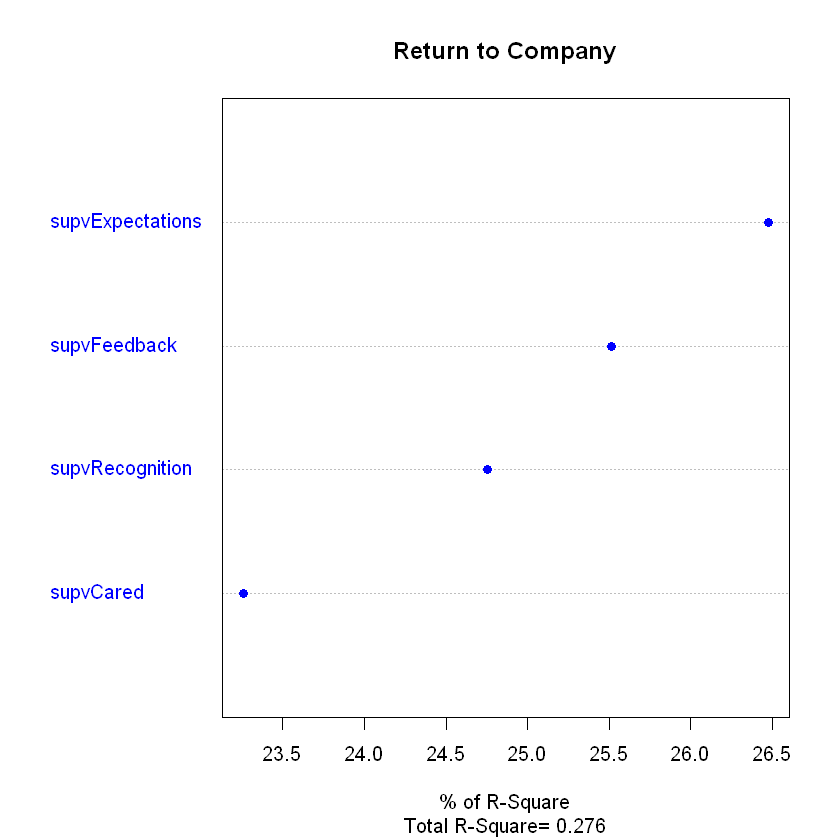

In [43]:
# Code taken from page 209-211 in Robert I. Kabacoff book, R In Action:  Data analysis and graphics with R
# Fitting the regression equation
fit1 <- lm(returnToCompany ~ supvExpectations + supvFeedback + supvRecognition + supvCared, data=mydata)
relweights1(fit1, col="blue")

,Weights
supvRecognition,20.33389
supvCared,24.55446
supvExpectations,27.15154
supvFeedback,27.96011


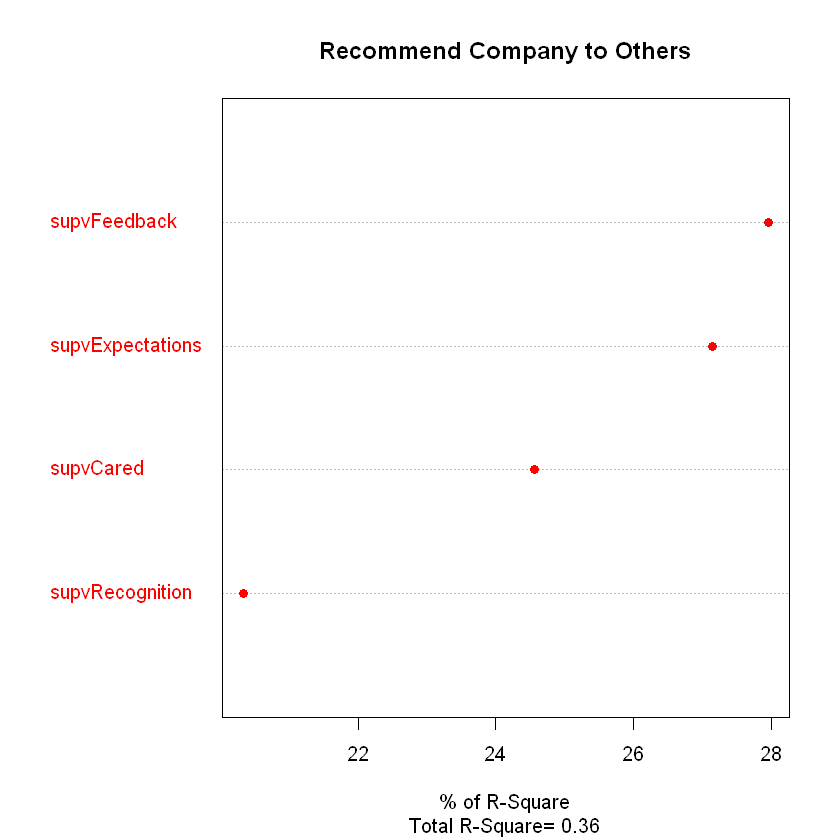

In [44]:
# Code taken from page 209-211 in Robert I. Kabacoff book, R In Action:  Data analysis and graphics with R
# Fitting the regression equation
fit2 <- lm(recommendCompany ~ supvExpectations + supvFeedback + supvRecognition + supvCared, data=mydata)
relweights2(fit2, col="red")

# Results
The RWA results suggest the four supervisor items do a better job at predicting how likely exit survey respondents would "Recommend" over "Return".  Total R-Square for "Recommend" is .36 compared to .276 for "Return".

The two items that accounted for the highest percent of R-Square for both outcome items were "My supervisor set clear expectations", and "My supervisor provided me with timely feedback".


# Discussion
Results look promising.  Total R-Square for both outcome items similar to what is found using RWA with engagement survey data and active employees.  One of the more interesting findings in this study is that the Total R-Square is higher for the item, "I would recommend this company to others" rather than, "If given the opportunity in the future, how likely are you to consider returning to the company."  A company that focuses on developing managers to provide timely feedback and clear expectations to its employees, may just receive more positive ratings by exited employees on sites like Glassdoor.  This may give a company a slight advantage over a competitor especially in a tight labor market.